In [1]:
from object_classes import object_classes
import glob 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# path 
path = r'C:\Users\jyc13\Documents\Python Scripts\openCV_eyemovement\yolov5\runs\detect\exp5\labels'

# YOLO style: (num_class center_x center_y w, h \n) 모든 값은 resoluion 기준으로 비율

# read all txt files in the path
files = glob.glob(f'{path}/*.txt')
data = []
for file in files:
    n_frame = int(file.split('_')[-1].replace('.txt', ''))
    with open(file, 'rt') as f:
        lines = f.readlines()
        for line in lines:
            splited = line.split(' ')
            num_class = int(splited[0])
            class_name = str(object_classes[num_class])
            center_x = float(splited[1])
            center_y = float(splited[2])
            w = float(splited[3])
            h = float(splited[4])

            frame_data = [n_frame, num_class, class_name, center_x, center_y, w, h]
            data.append(frame_data)

# format Dataframe
df = pd.DataFrame(data)
df.rename(columns = {0:'n_frame'}, inplace = True)
df.rename(columns = {1:'num_class'}, inplace = True)
df.rename(columns = {2:'class_name'}, inplace = True)
df.rename(columns = {3:'center_x'}, inplace = True)
df.rename(columns = {4:'center_y'}, inplace = True)
df.rename(columns = {5:'width'}, inplace = True)
df.rename(columns = {6:'height'}, inplace = True)

df.sort_values(by=['n_frame', 'num_class'], inplace=True, ignore_index=True)

# diff
df['diff_x'] = df.groupby(by=['n_frame'])['center_x'].diff()
df['diff_y'] = df.groupby(by=['n_frame'])['center_y'].diff()
display(df)

,n_frame,num_class,class_name,center_x,center_y,width,height,diff_x,diff_y
0,1,0,eye,0.606145,0.280208,0.128492,0.068750,NaN,NaN
1,1,1,pupil,0.601955,0.284375,0.075419,0.056250,-0.004190,0.004167
2,2,0,eye,0.604749,0.280208,0.131285,0.068750,NaN,NaN
3,2,1,pupil,0.601955,0.284375,0.075419,0.056250,-0.002794,0.004167
4,3,0,eye,0.604749,0.280208,0.131285,0.068750,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6925,3525,1,pupil,0.600559,0.284375,0.067039,0.047917,-0.005586,0.003125
6926,3526,0,eye,0.603352,0.281250,0.134078,0.066667,NaN,NaN
6927,3526,1,pupil,0.600559,0.284375,0.067039,0.047917,-0.002793,0.003125
6928,3527,0,eye,0.606145,0.281250,0.134078,0.066667,NaN,NaN


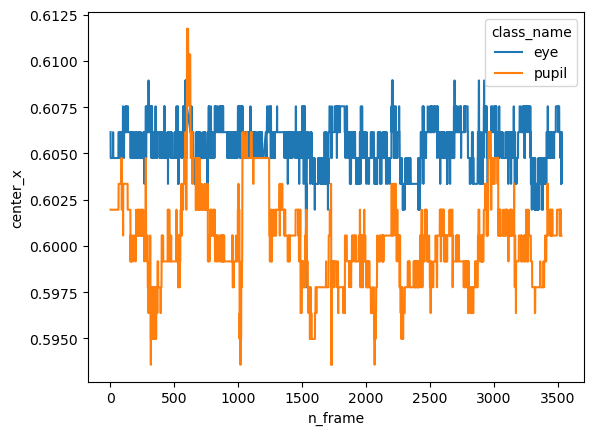

In [2]:
# x-axis
sns.lineplot(x='n_frame', y='center_x', hue='class_name', data=df)
plt.show()

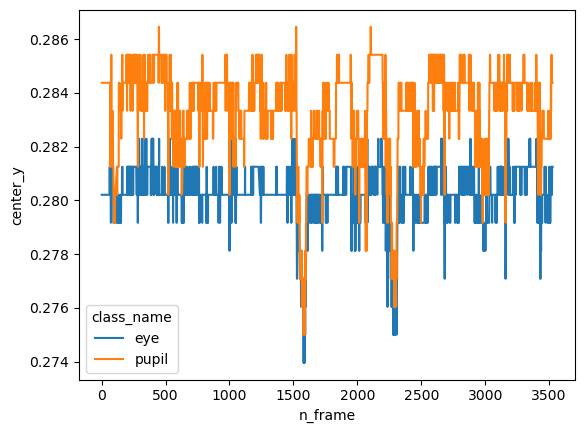

In [3]:
# y-axis
sns.lineplot(x='n_frame', y='center_y', hue='class_name', data=df)
plt.show()

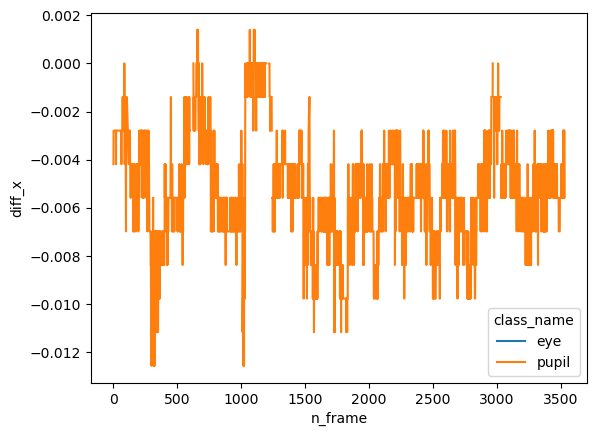

In [5]:
# diff_x
sns.lineplot(x='n_frame', y='diff_x', hue='class_name', data=df)
plt.show()

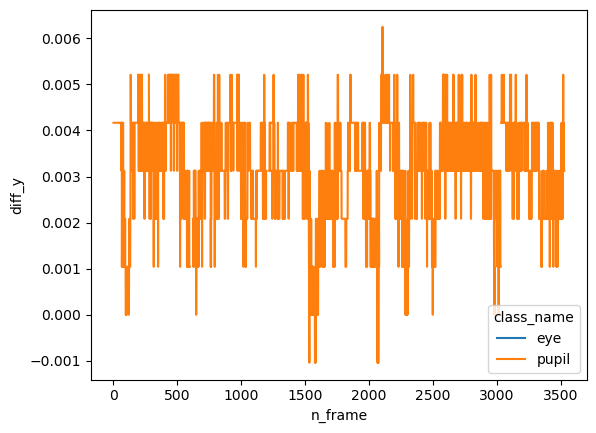

In [6]:
# diff_y
sns.lineplot(x='n_frame', y='diff_y', hue='class_name', data=df)
plt.show()